In [3]:
df=pd.read_excel("E:\HTL Project\HTL Raw data.xlsx")
df.head()

<IPython.core.display.Javascript object>

,Feedstock,Type,Moisture,Volatile,Ash,Proteins,lipids,carbohydrates,C,H,...,O,S,Culture Condition,Catalyst,Temp,Time,Pressure,HHV,ERR,Yield%
0,Spirulina platensis,microalgae,11.8,67.0,8.6,53.0,7.5,11.0,72.7,8.8,...,11.5,0.6,open pond,Na2CO3,300,30,130,35.2,37.2,36.0
1,Nannochloropsis,microalgae,3.9,67.4,24.4,52.0,14.0,27.0,76.0,10.3,...,9.0,0.8,Flask,H-ZSM5,350,60,180,37.9,42.7,43.0
2,Chlorella vulgaris,microalgae,5.8,67.3,9.5,49.5,11.0,14.2,70.6,9.2,...,12.3,0.4,open pond,LiOH,250,60,100,33.8,33.0,33.0
3,Porphyridium purpureum,microalgae,8.5,61.6,18.5,45.6,12.1,NaN,69.1,8.4,...,15.2,0.5,PBR,NaN,250,30,100,34.8,41.5,24.7
4,Dunaliella tertiolecta,microalgae,4.9,54.4,13.5,34.0,23.0,21.0,72.0,8.8,...,9.9,0.3,NaN,Na2CO3,375,50,221,36.0,64.8,55.3


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Feedstock']=le.fit_transform(df['Feedstock'])
df['Type']=le.fit_transform(df['Type'])
df['Culture Condition']=le.fit_transform(df['Culture Condition'])
df['Catalyst']=le.fit_transform(df['Catalyst'])

In [5]:
df['Moisture']=df['Moisture'].fillna(df['Moisture'].mode()[0])
df['Volatile']=df['Volatile'].fillna(df['Volatile'].mode()[0])
df['carbohydrates']=df['carbohydrates'].fillna(df['carbohydrates'].mode()[0])
df['S']=df['S'].fillna(df['S'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])
df['lipids ']=df['lipids '].fillna(df['lipids '].mode()[0])

In [93]:
x=df.drop('Yield%',axis=1)
y=df['Yield%']
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
regressor = RandomForestRegressor(n_estimators=25,max_depth=10)
regressor.fit(x_train, y_train)
y_pred =regressor.predict(x_test)
y_pred
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
regressor2 = RandomForestRegressor(n_estimators=25,max_depth=10)
regressor2.fit(x_train, y_train)
y_pred1 =regressor2.predict(x_train)
y_pred1
from sklearn.metrics import r2_score
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  3.0471785714285717


<IPython.core.display.Javascript object>

Root mean square error:  0.24557623825645017
R2 square:  0.8378585525291338


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  1.6266273809523824


<IPython.core.display.Javascript object>

Root mean square error:  0.030130760318877278
R2 square:  0.948388093360151


# GridSearchCV

In [7]:
params = {
    'max_depth': [i for i in range(1,30+1)],
    'n_estimators': [i for i in range(1,100+1)]
}

In [8]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=regressor,
                           param_grid=params,
                           cv = 5,
                           n_jobs=4, verbose=2)

In [9]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=2)

In [10]:
rf_grid.best_params_

{'max_depth': 9, 'n_estimators': 29}

In [12]:
print(rf_grid.score(x_train,y_train))
print(rf_grid.score(x_test,y_test))        

0.9289711999829013
0.8446366782496688


In [13]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data.head()

<IPython.core.display.Javascript object>

,Actual,Predicted
43,37.6,33.565
37,36.1,34.644
79,19.0,18.829
78,19.0,19.121
67,25.2,25.892


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

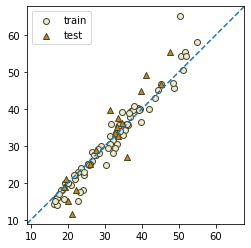

In [14]:
fig, ax = plt.subplots()
ax.scatter(y_pred1,y_train,label='train',color='#e8e7d8',edgecolors='#494623')
ax.scatter(y_pred,y_test,label='test',color='#c3892b',marker ="^",edgecolors='#494623')
#ax.xlabel('Actual Values of HHV',fontsize=14)
#ax.ylabel('Predicted Values of HHV',fontsize=14)
ax.legend()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, '--')
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
fig.savefig('/Users/Rishi Chaitanya/Desktop/RF yield 3.png', dpi=300)

# RandomizedSearchCV

In [15]:
from sklearn.model_selection import RandomizedSearchCV
rf_grid = RandomizedSearchCV(estimator=regressor,
                           param_distributions=params,cv = 5,
                           n_jobs=4, verbose=2)

In [16]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   verbose=2)

In [17]:
print(rf_grid.score(x_train,y_train))
print(rf_grid.score(x_test,y_test))

0.9278941150524583
0.8585853422388485


# BayesSearchCV

In [26]:
from skopt import BayesSearchCV

In [27]:
rf_grid = BayesSearchCV(estimator=regressor,
                           search_spaces=params,cv = 5,
                           n_jobs=4, verbose=2)

In [28]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=4,
              search_spaces={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20,
                                           21, 22, 23, 24, 25, 26, 27, 28, 29,
                                           30],
                             'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
              verbose=2)

In [32]:
rf_grid.best_params_

OrderedDict([('max_depth', 15), ('n_estimators', 87)])

In [35]:
print(rf_grid.score(x_train,y_train))
print(rf_grid.score(x_test,y_test))

0.9382366894268994
0.8300839125417512


In [36]:
1 - (1-rf_grid.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.8927132665537236

In [16]:
regressor.predict([[3,1,5.8,67.3,9.5,49.5,11,14.2,58.8,6.5,6.7,27.3,0.2,3,19,350,60,180,29.2,25]])#open pond, #Zno

array([31.305])

In [17]:
regressor.predict([[18,1,6.9,68.5,25.5,53,13,13.5,73,8.2,5.7,12.6,0.1,2,4,350,60,180,33.6,26.5]])#Scenedesmus,#Raceway#CaOH2

array([34.143])

In [18]:
regressor2.predict([[23,0,10,72.3,11.9,8.4,4.3,35.2,51.4,10.2,0.8,36.4,0.2,1,4,380,60,150,26,17]])#Ulva Lactuca#PBR#CaOH2

array([21.876])

In [19]:
regressor.predict([[15,1,6.7,78.9,6.4,51.7,21.8,15.9,52.3,7.4,7.5,31.7,0.1,2,16,300,60,180,23,50]])#Scenedesmus abundans#Raceway#NaoH

array([32.106])

In [20]:
regressor2.predict([[4,1,10,72.3,7.6,41.8,8.2,37.8,66.5,7.2,6.8,19,0.4,1,22,300,60,150,32,14]])#Chlorogloeopsis fritschii#PBR#NO

array([33.779])

In [21]:
regressor2.predict([[18,1,6.9,68.5,25.5,53,13,13.5,54.1,7.8,7,30.6,0.6,2,16,300,60,150,35,41.6]])

array([36.19])